In [ ]:
"""
File : RF_LSTM.ipynb
Created by : Amen Ouannes
Brief : Compare the predictions from RF and LSTM on multiple time sequences for different calves

"""

In [2]:
#importing libraries
import pickle as pk
import numpy as np
import matplotlib.pyplot as plt
import ML_tools as tools
import LSTM_tools as lstm
import importlib
importlib.reload(tools)
importlib.reload(lstm)
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
import tensorflow as tf

In [4]:
#load the best models for each algorithm
with tf.device('/CPU:0'):

    with open('best_RF.pkl', 'rb') as f:
        
        rf_model = pk.load(f) #load best model for RF
        label_encoder = pk.load(f)
    lstm_model = load_model('final_model.keras') #load best model for lstm

    #load the full dataset to predict on 
    with open('full_dataset.pkl' , 'rb') as f:
        full_dataset = pk.load(f)
    list_id = tools.list_id()
    required_columns = ['acc_x', 'acc_y', 'acc_z', 'st_dev_x', 'st_dev_y', 'st_dev_z', 'ax_dynamic', 'ay_dynamic', 'az_dynamic']

### Model based on the full dataset

#### STATIC DOWN

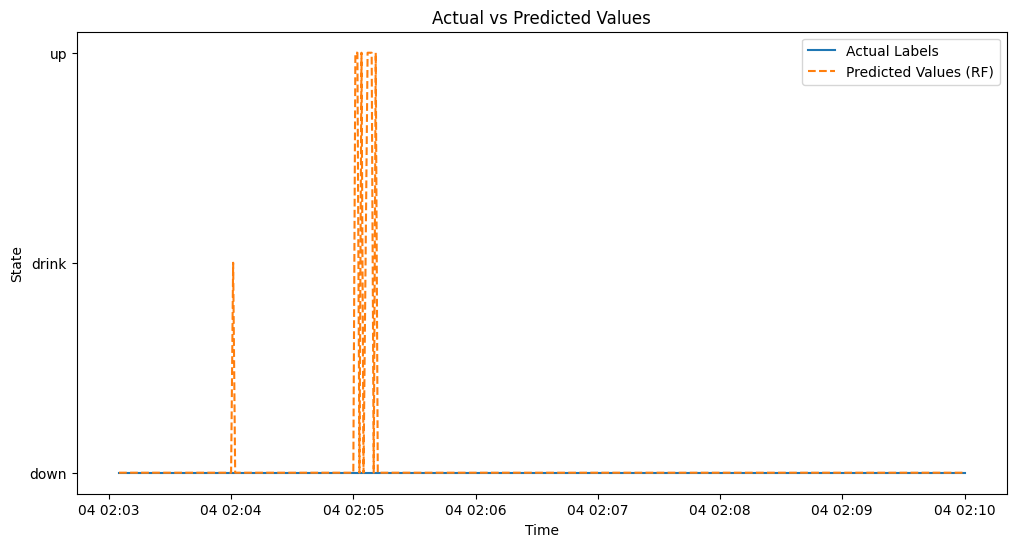

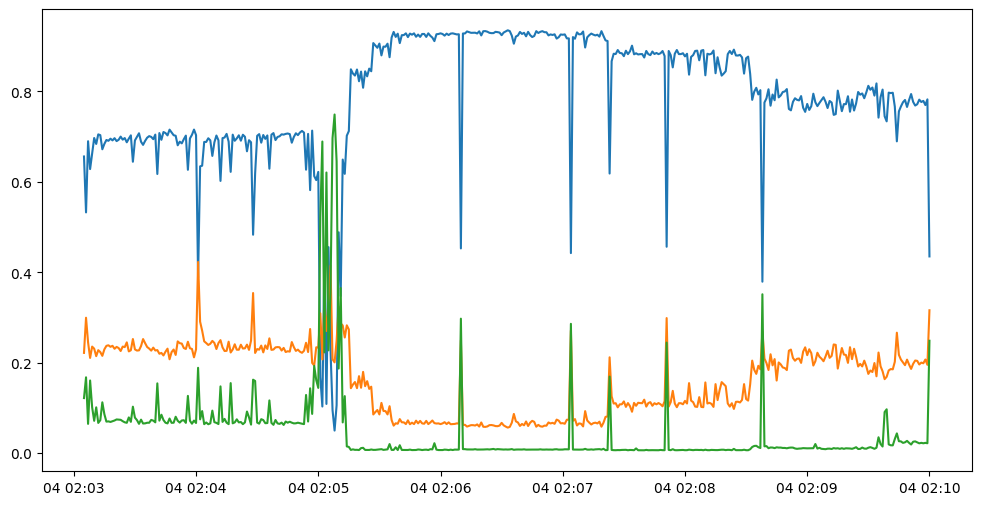

In [73]:
tools.compare_rf(full_dataset, list_id[0], rf_model,label_encoder, "2024-05-04 02:03:00", "2024-05-04 02:10:00")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


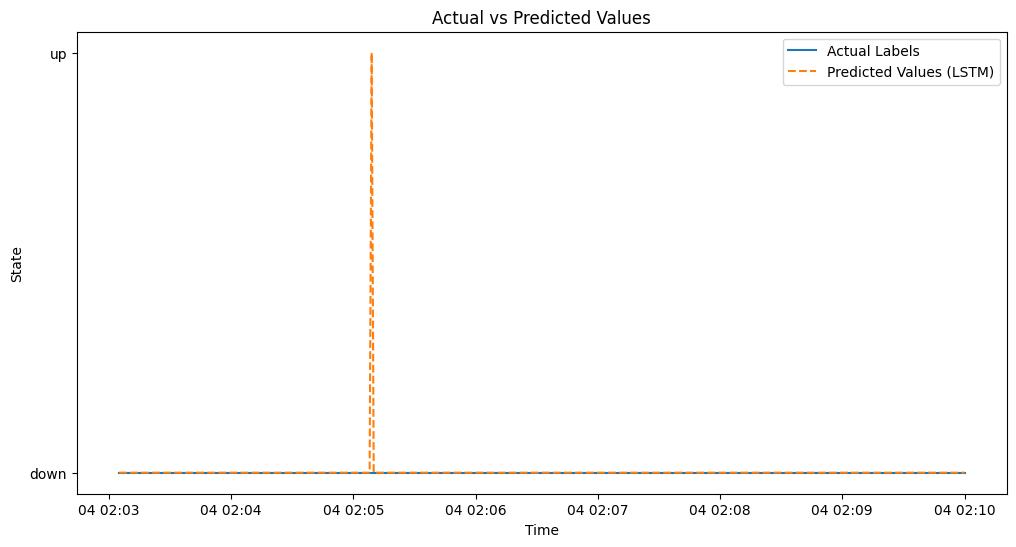

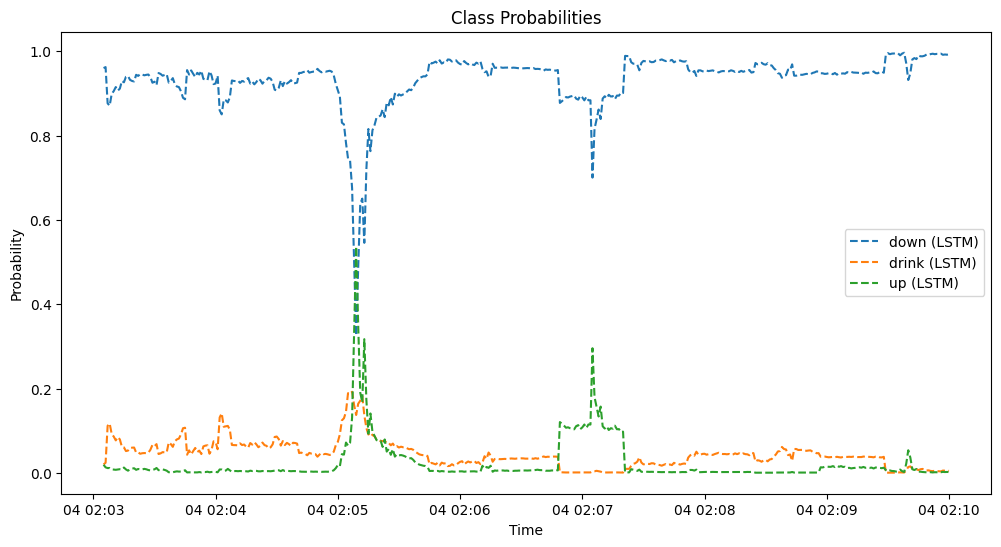

In [71]:
tools.compare_lstm(full_dataset, list_id[0], lstm_model, "2024-05-04 02:03:00", "2024-05-04 02:10:00")

#### STATIC UP

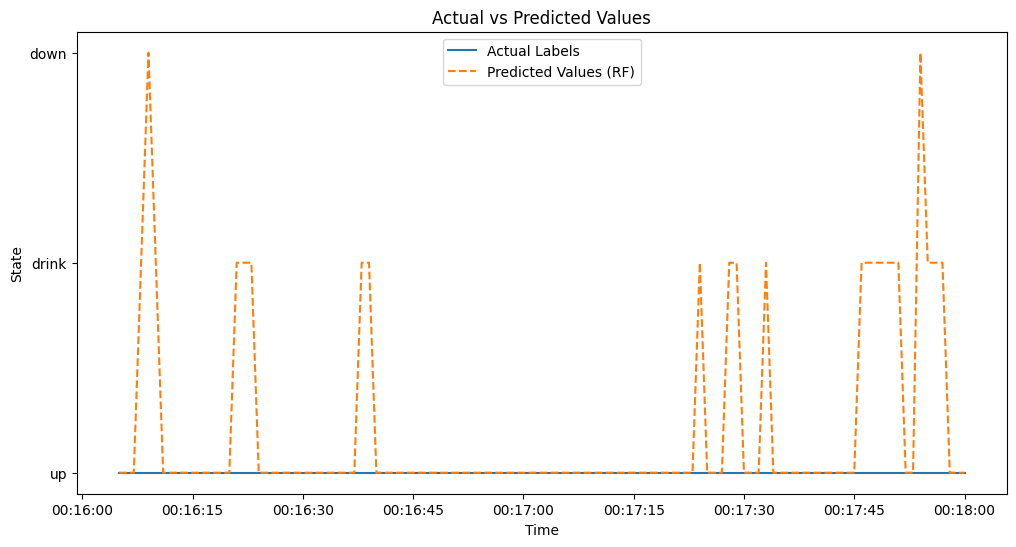

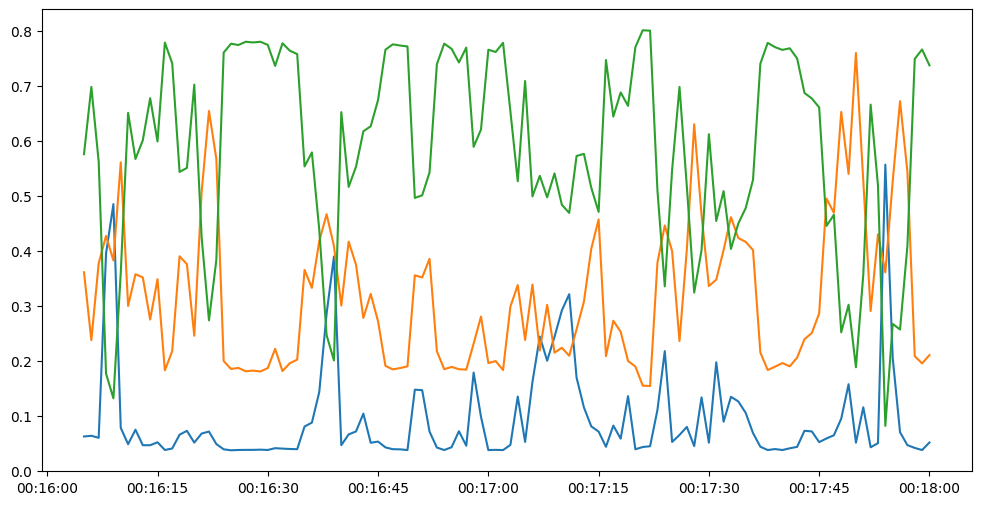

In [62]:
tools.compare_rf(full_dataset, list_id[0], rf_model,label_encoder, "2024-05-04 00:16:00", "2024-05-04 00:18:00")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


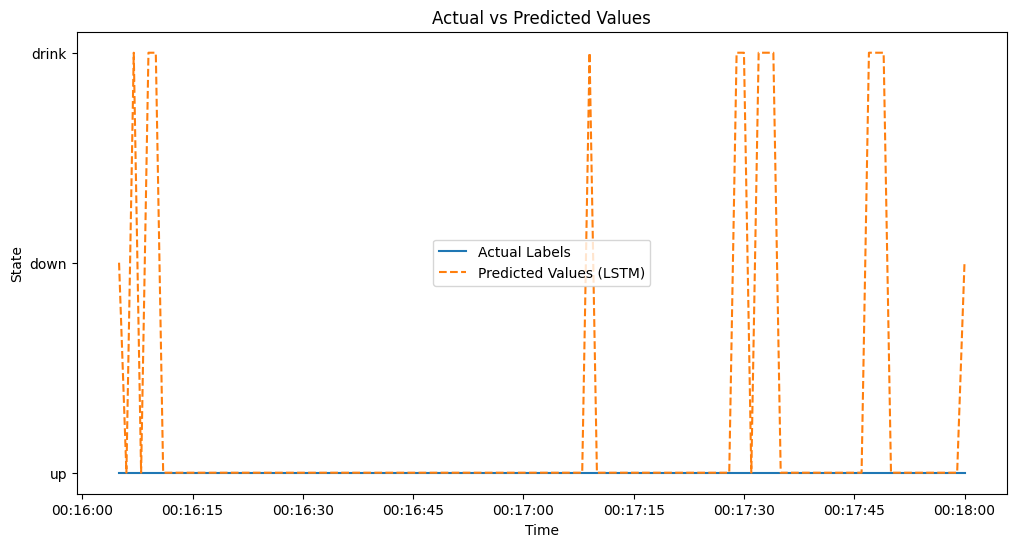

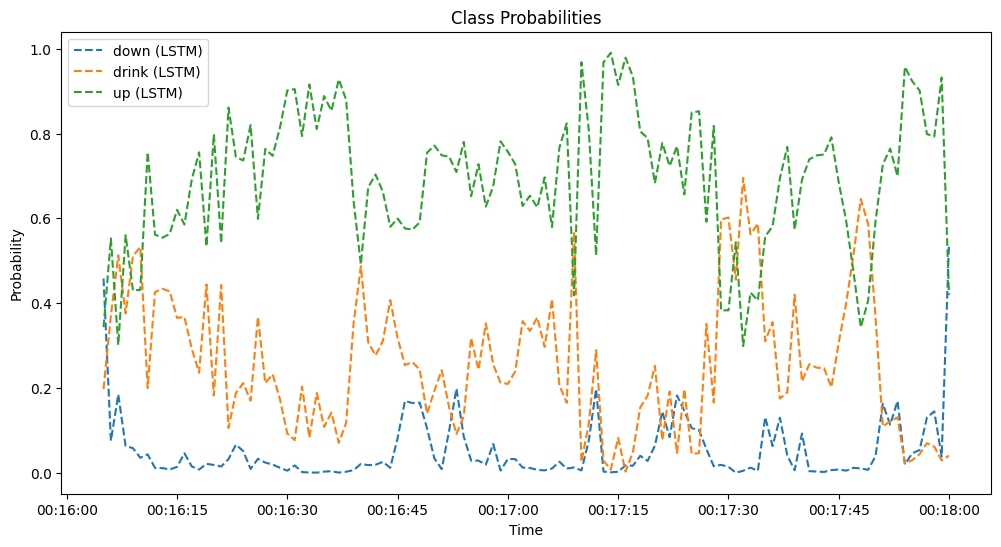

In [63]:
tools.compare_lstm(full_dataset, list_id[0], lstm_model, "2024-05-04 00:16:00", "2024-05-04 00:18:00")

#### STATIC DRINK

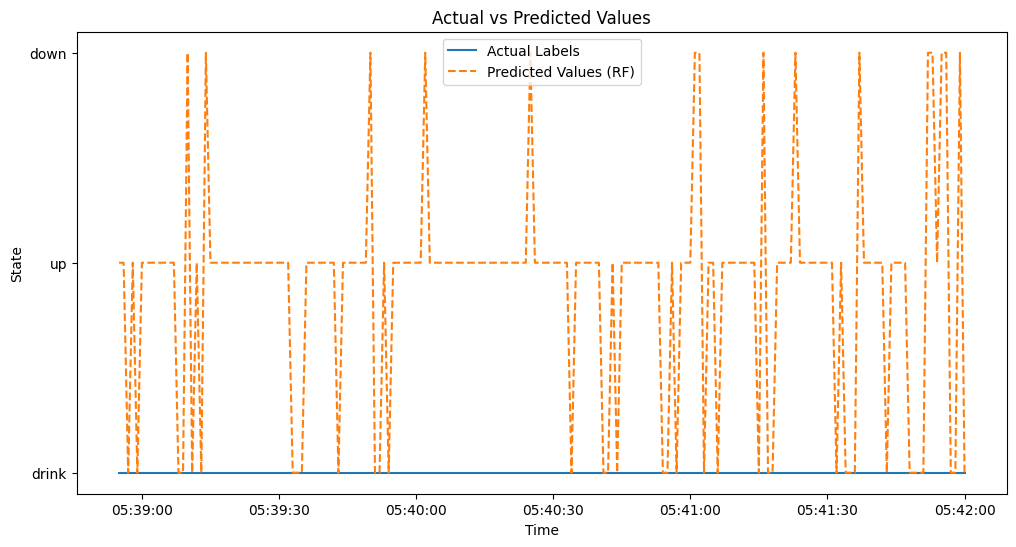

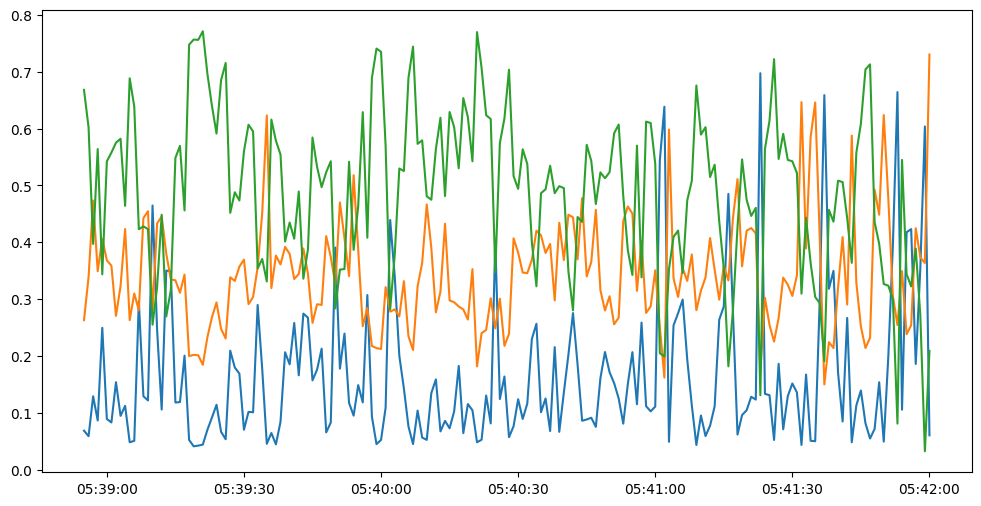

In [58]:
tools.compare_rf(full_dataset, list_id[0], rf_model,label_encoder, "2024-05-04 05:38:50", "2024-05-04 05:42:00")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


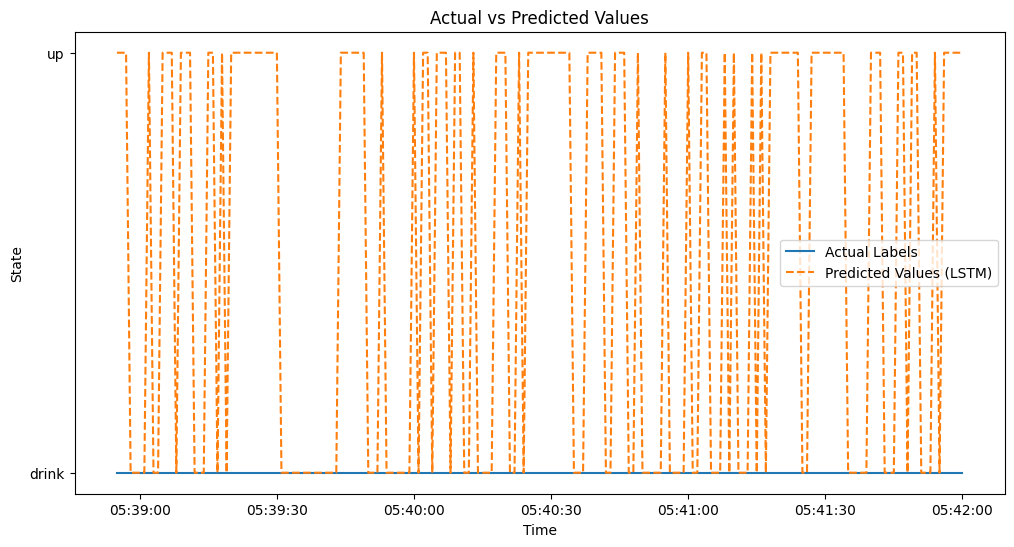

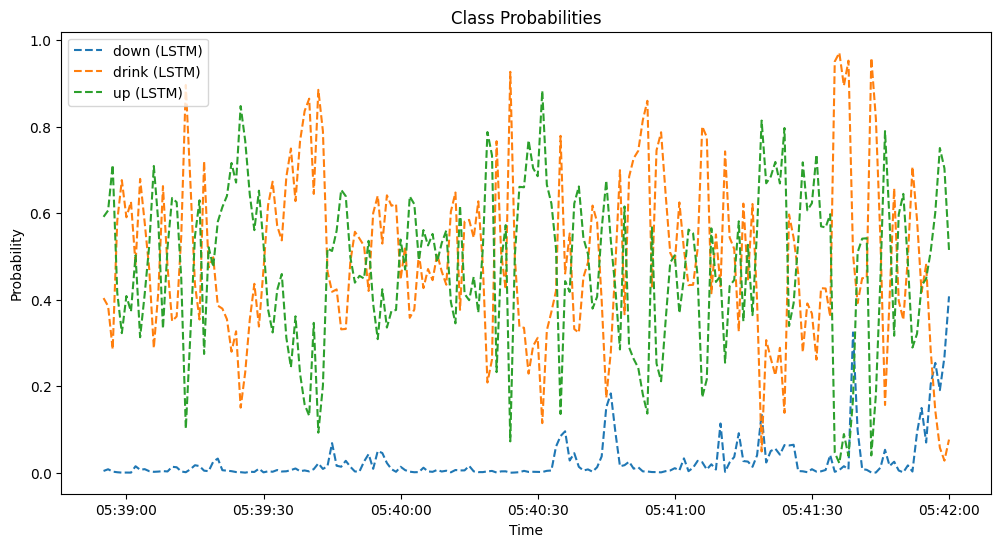

In [64]:
tools.compare_lstm(full_dataset, list_id[0], lstm_model, "2024-05-04 05:38:50", "2024-05-04 05:42:00")

#### DOWN TO UP

[0 1 2]


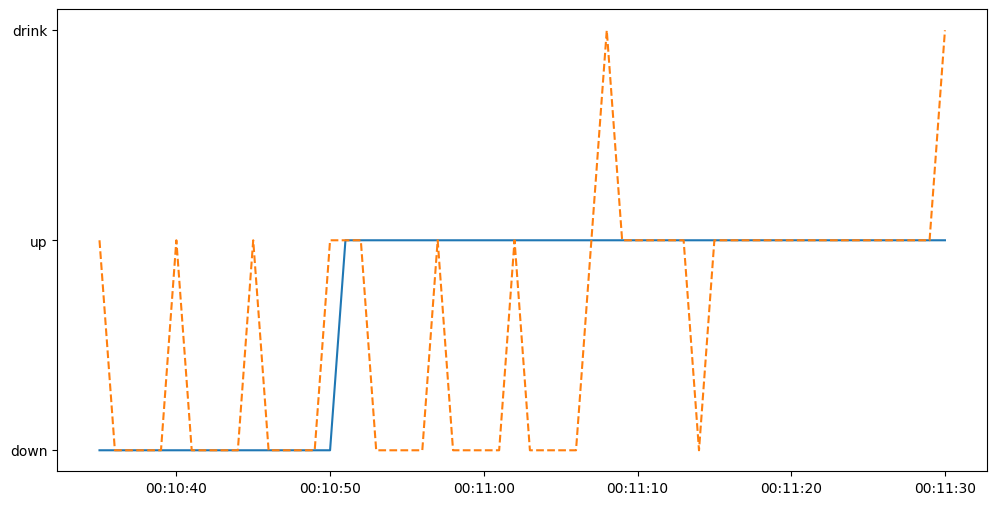

In [11]:
tools.compare_rf(full_dataset, list_id[0], rf_model,label_encoder, "2024-05-04 00:10:30", "2024-05-04 00:11:30")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


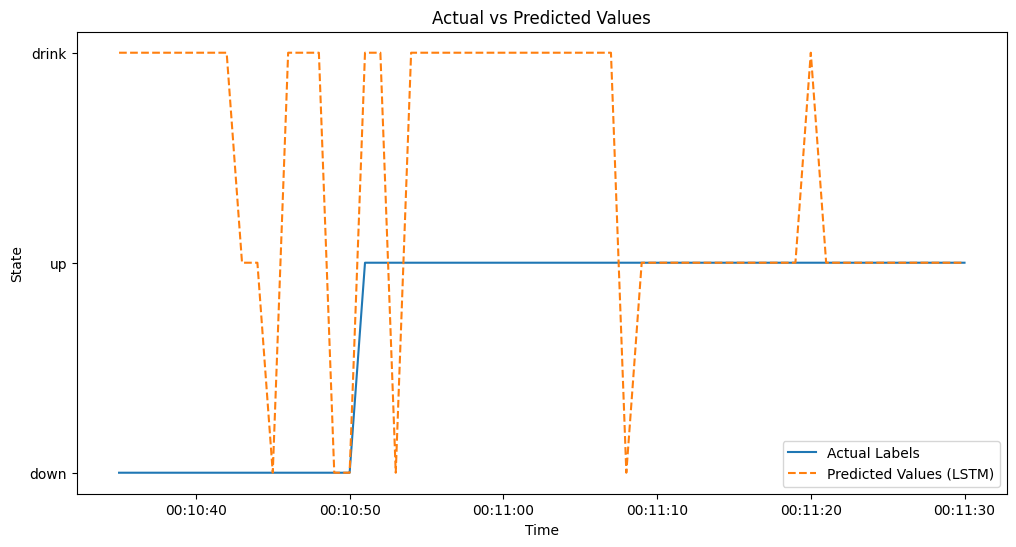

In [89]:
tools.compare_lstm(full_dataset, list_id[0], lstm_model, "2024-05-04 00:10:30", "2024-05-04 00:11:30")

#### UP TO DOWN

[0 1 2]


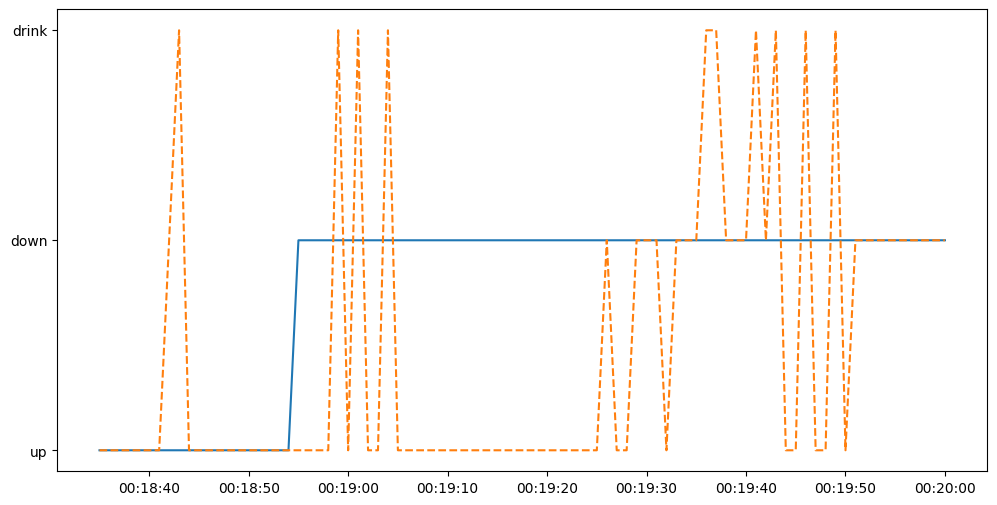

In [12]:
tools.compare_rf(full_dataset, list_id[0], rf_model,label_encoder, "2024-05-04 00:18:30", "2024-05-04 00:20:00")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


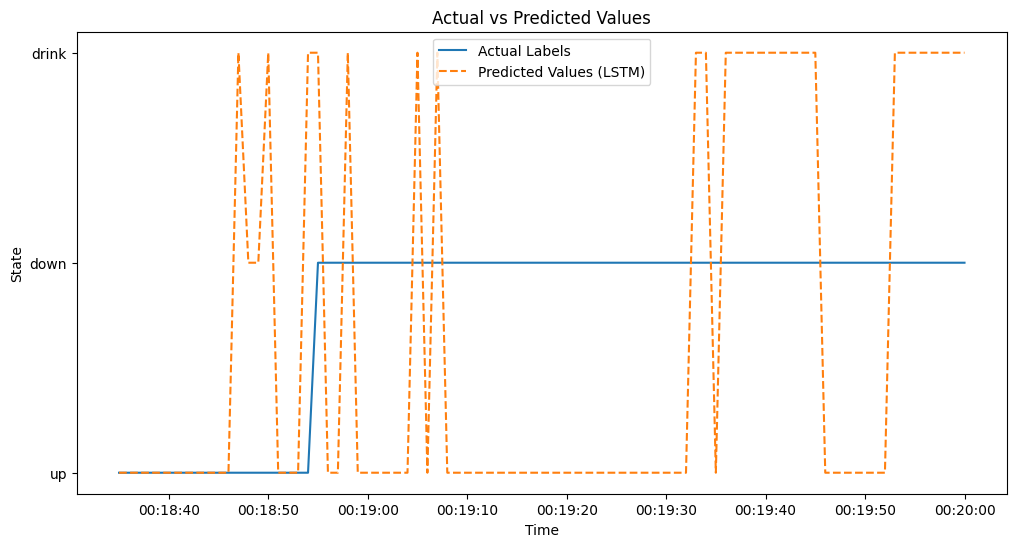

In [90]:
tools.compare_lstm(full_dataset, list_id[0], lstm_model, "2024-05-04 00:18:30", "2024-05-04 00:20:00")

#### DRINK TO UP

[0 1 2]


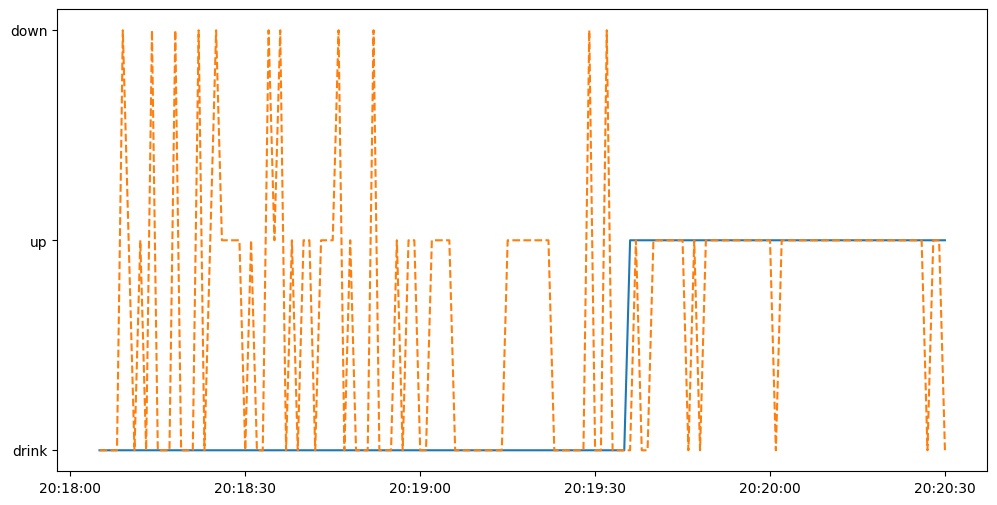

In [14]:
tools.compare_rf(full_dataset, list_id[0], rf_model,label_encoder, "2024-05-10 20:18:00", "2024-05-10 20:20:30")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


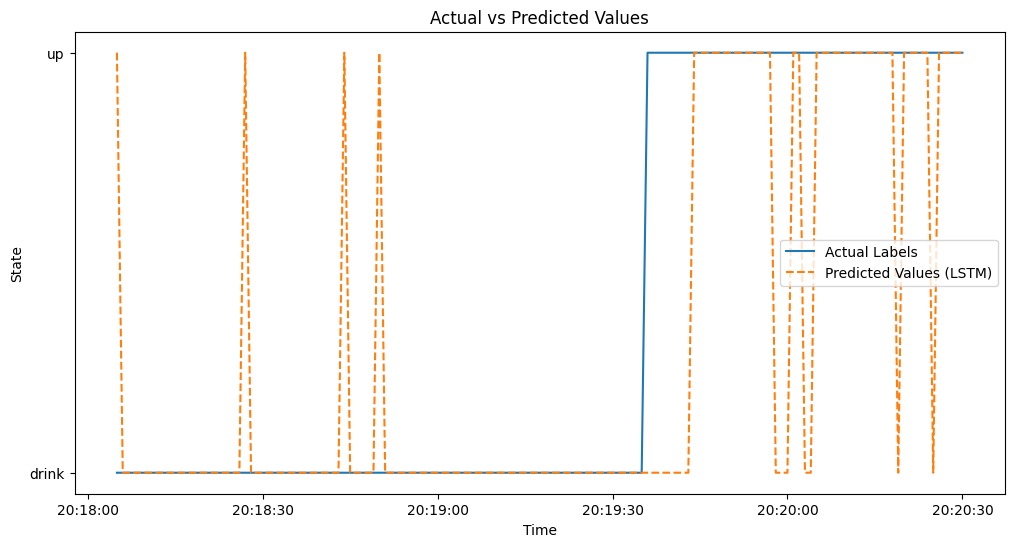

In [95]:
tools.compare_lstm(full_dataset, list_id[0], lstm_model, "2024-05-10 20:18:00", "2024-05-10 20:20:30")

#### UP TO DRINK

[0 1 2]


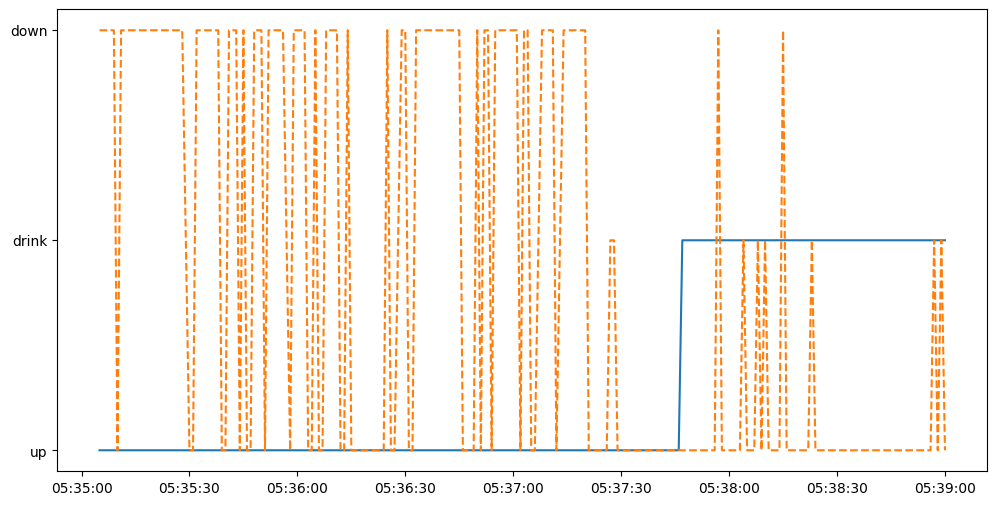

In [15]:
tools.compare_rf(full_dataset, list_id[0], rf_model,label_encoder, "2024-05-04 05:35:00", "2024-05-04 05:39:00")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


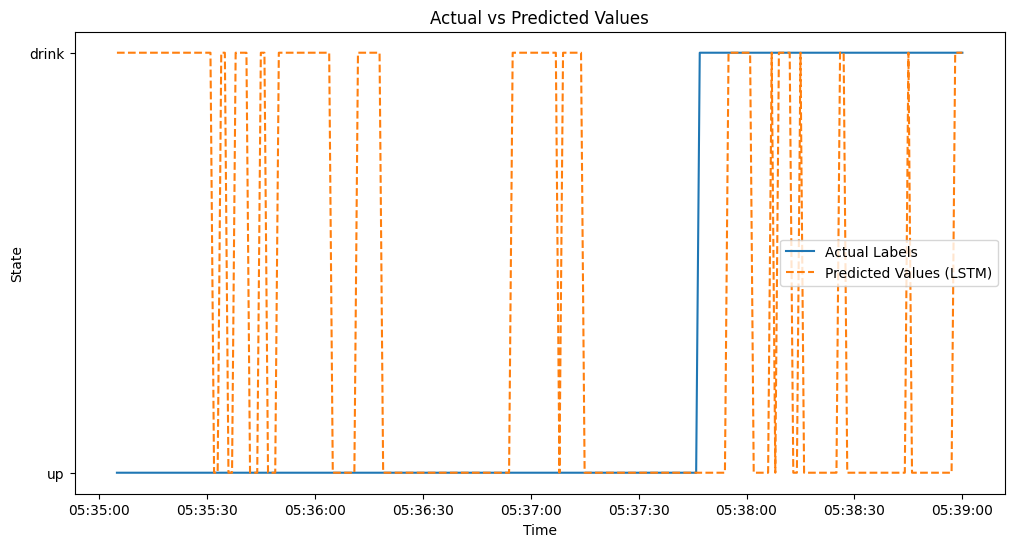

In [97]:
tools.compare_lstm(full_dataset, list_id[0], lstm_model, "2024-05-04 05:35:00", "2024-05-04 05:39:00")

FULL DAY VISUALISATION

#### RUUVI V1

2701/2701 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


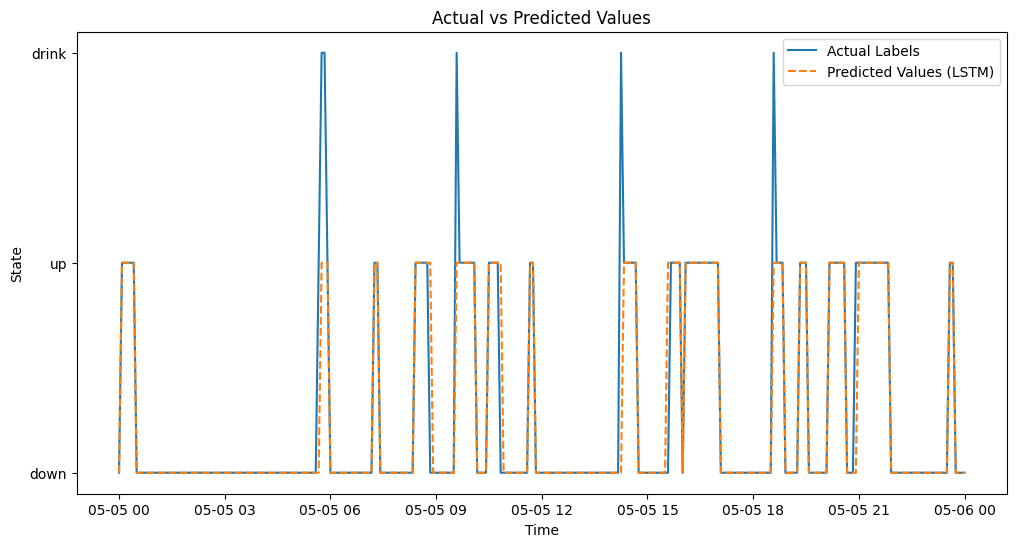

In [11]:
fullv1 = load_model('final_modelv1.keras')
final_fullv1 = tools.generate_predictions(calf1, fullv1, "2024-05-04 23:59:55", "2024-05-05 00:00:00", "2024-05-06 00:00:00", 1)
tools.visualize(final_fullv1)

2701/2701 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step


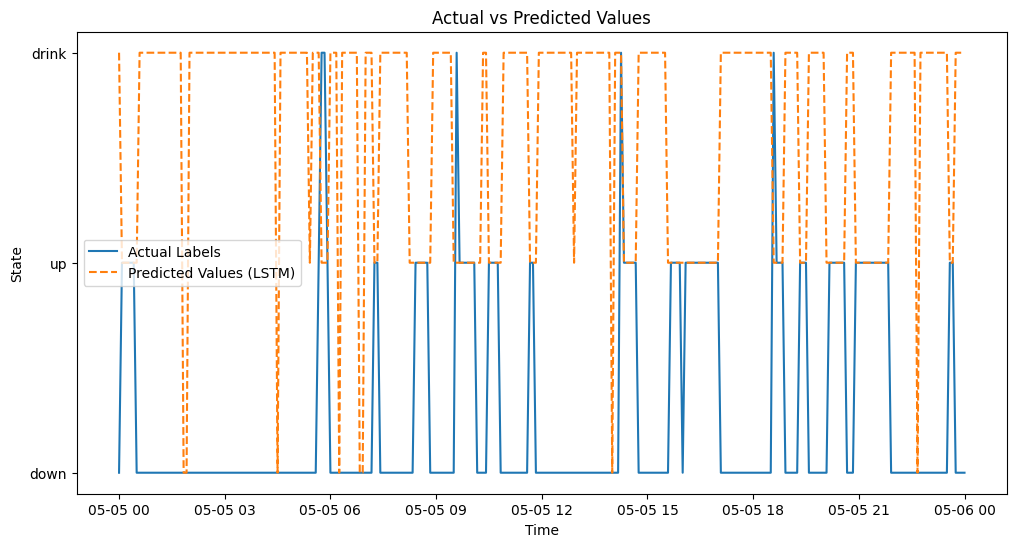

In [13]:
undersampledv1 = load_model('undersampledv1.keras')
undersampledv1 = tools.generate_predictions(calf1, undersampledv1, "2024-05-04 23:59:55", "2024-05-05 00:00:00", "2024-05-06 00:00:00", 1)
tools.visualize(undersampledv1)

#### RUUVI V2

2701/2701 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step


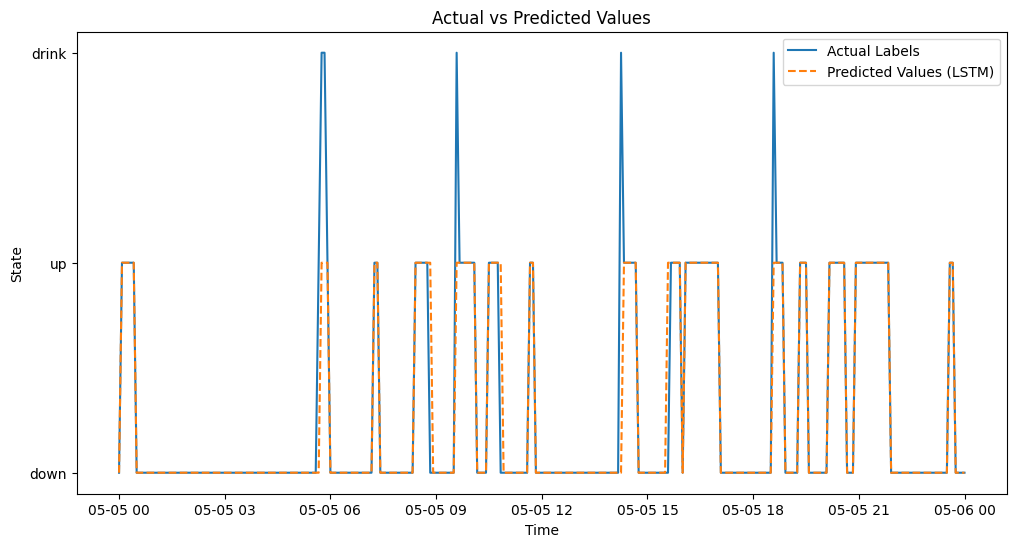

In [8]:
final_full = tools.generate_predictions(calf1, lstm_model, "2024-05-04 23:59:55", "2024-05-05 00:00:00", "2024-05-06 00:00:00", 1)
tools.visualize(final_full)

2701/2701 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step


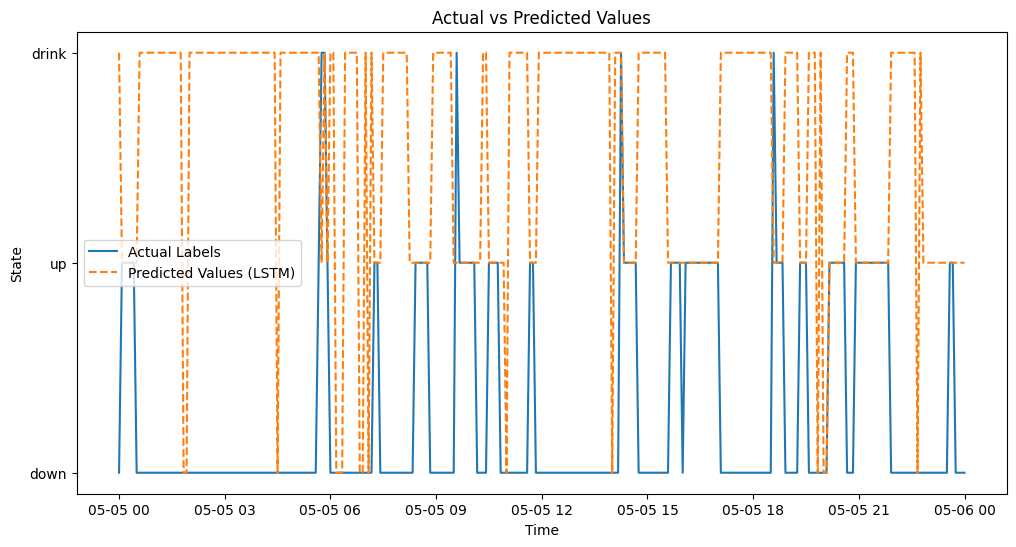

In [74]:
undersampled = tools.generate_predictions(calf1, lstm_model, "2024-05-04 23:59:55", "2024-05-05 00:00:00", "2024-05-06 00:00:00", 5)
tools.visualize(undersampled)

### Improved final model

2701/2701 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step
2701/2701 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step


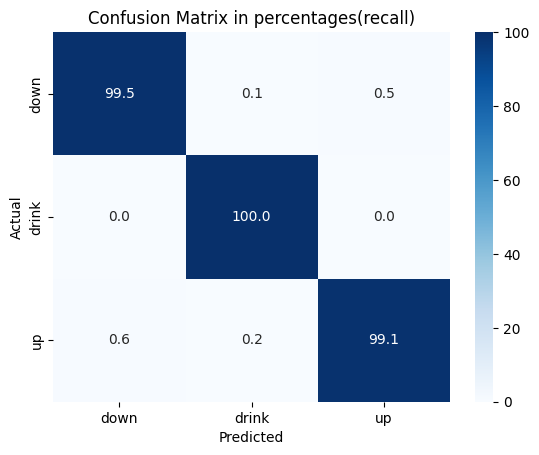

2701/2701 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9948 - loss: 0.0244
[0.02860593982040882, 0.9939236640930176]


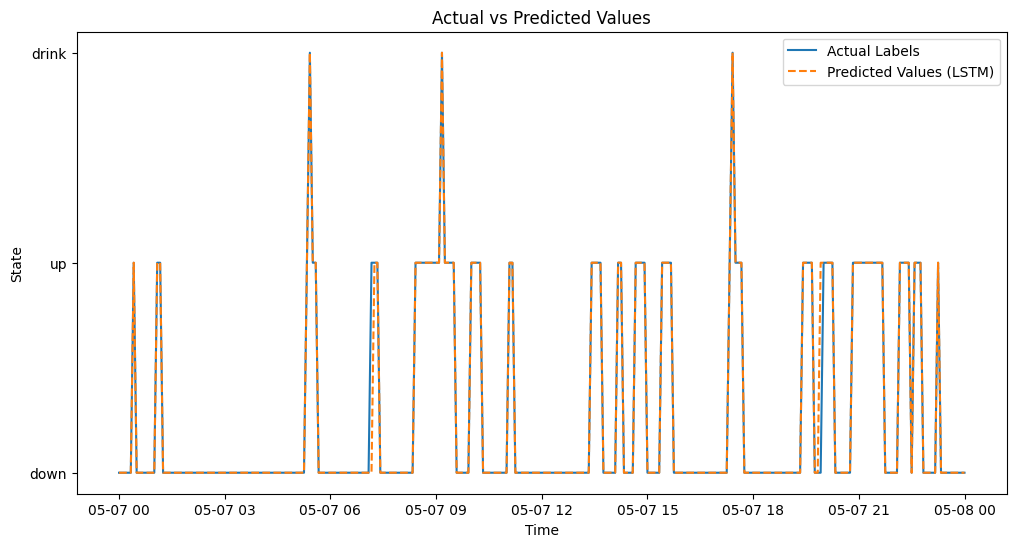

In [8]:
best = load_model('weighted50_5.keras')
model = tools.generate_predictions(full_dataset[list_id[0]], best, "2024-05-06 23:59:10", "2024-05-07 00:00:00", "2024-05-08 00:00:00", "2024-05-08 00:00:05", 5)
tools.visualize(model)

2701/2701 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step
2701/2701 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step


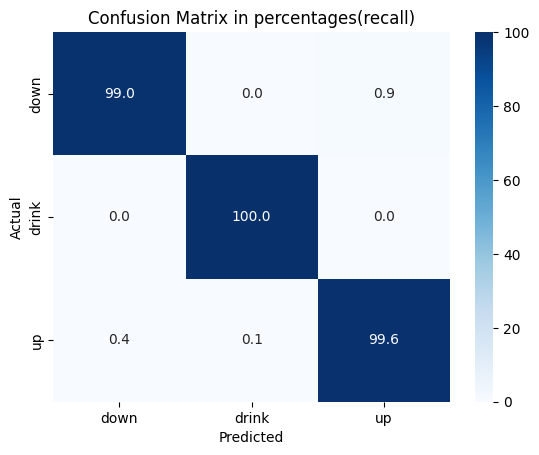

2701/2701 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9945 - loss: 0.0228
[0.029480110853910446, 0.9919445514678955]


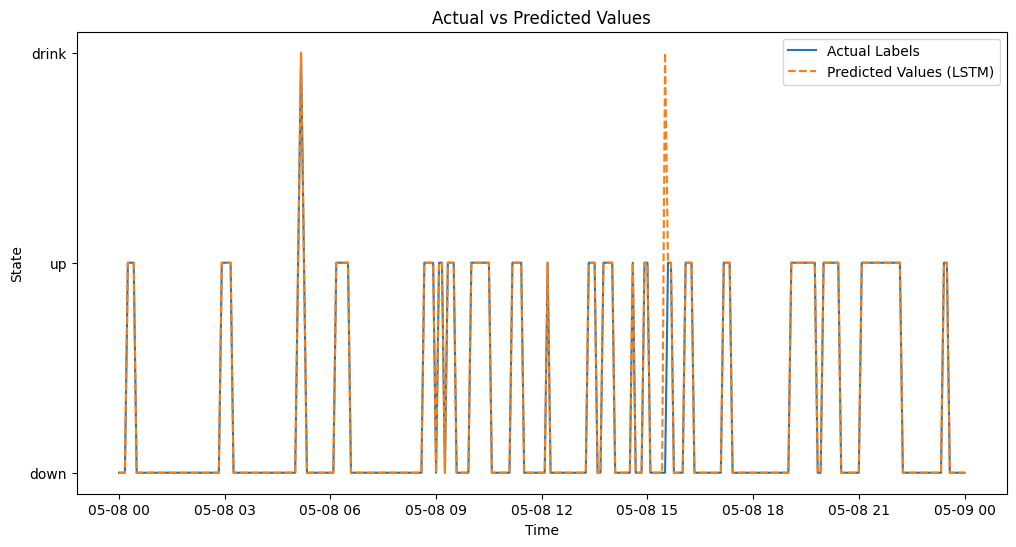

In [9]:
model = tools.generate_predictions(full_dataset[list_id[1]], best, "2024-05-07 23:59:10", "2024-05-08 00:00:00", "2024-05-09 00:00:00", "2024-05-09 00:00:05", 5)
tools.visualize(model)

2701/2701 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step
2701/2701 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step


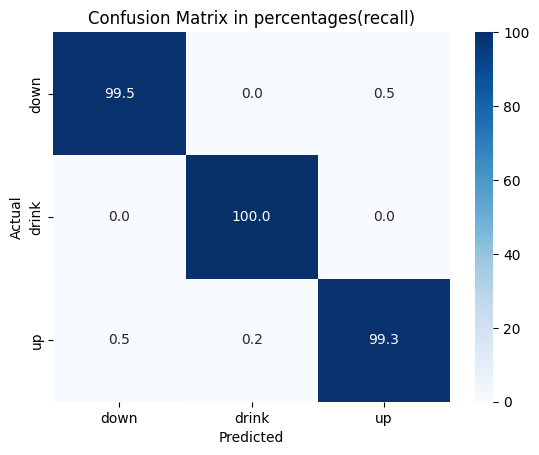

2701/2701 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9930 - loss: 0.0266
[0.025603104382753372, 0.9942940473556519]


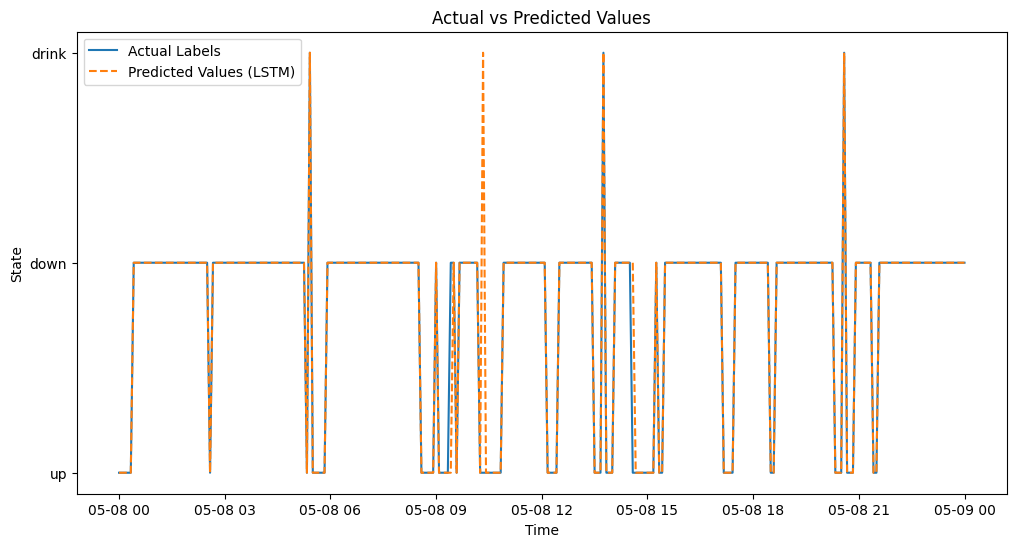

In [10]:
model = tools.generate_predictions(full_dataset[list_id[2]], best, "2024-05-07 23:59:10", "2024-05-08 00:00:00", "2024-05-09 00:00:00", "2024-05-09 00:00:05", 5)
tools.visualize(model)

2701/2701 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step
2701/2701 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step


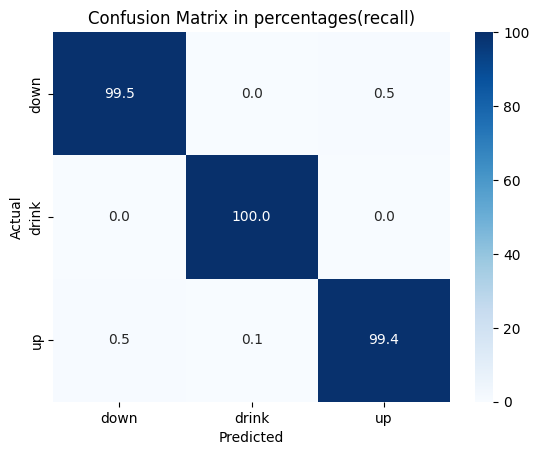

2701/2701 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9959 - loss: 0.0181
[0.024745583534240723, 0.9943982362747192]


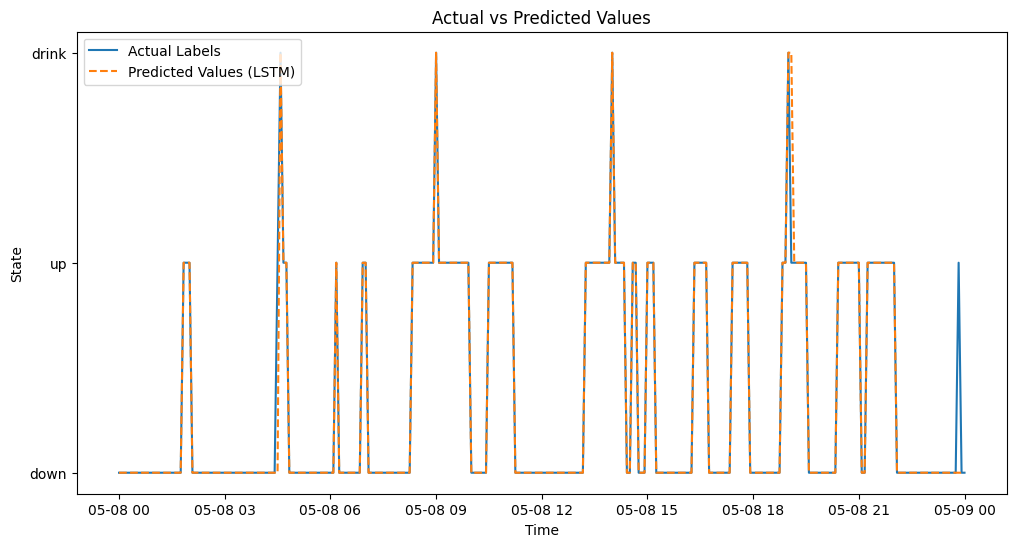

In [11]:
model = tools.generate_predictions(full_dataset[list_id[3]], best, "2024-05-07 23:59:10", "2024-05-08 00:00:00", "2024-05-09 00:00:00", "2024-05-09 00:00:05", 5)
tools.visualize(model)

2701/2701 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step
2701/2701 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step


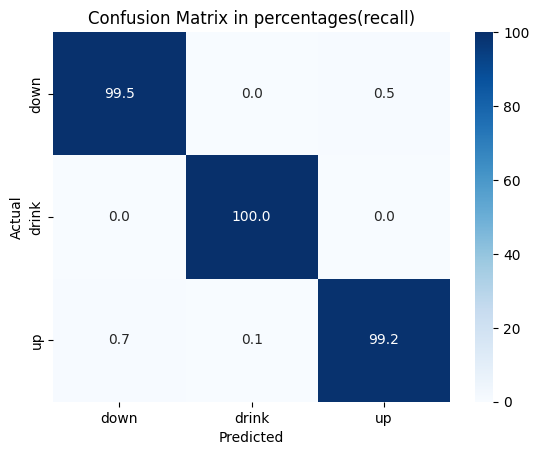

2701/2701 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9935 - loss: 0.0316
[0.027359794825315475, 0.9942824840545654]


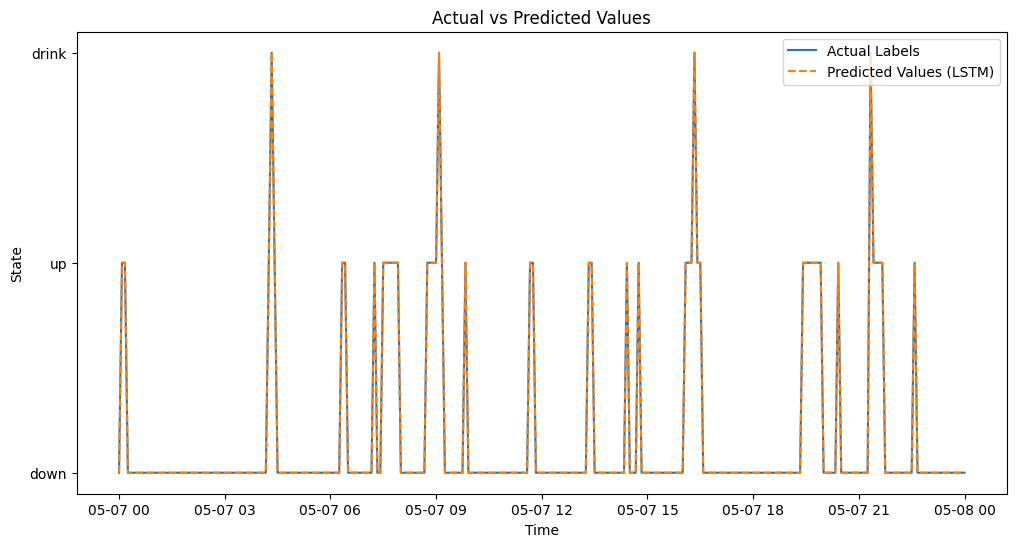

In [13]:

model = tools.generate_predictions(full_dataset[list_id[4]], best, "2024-05-06 23:59:10", "2024-05-07 00:00:00", "2024-05-08 00:00:00", "2024-05-08 00:00:05", 5)
tools.visualize(model)